## Import Packages and Functions

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import collections as col
import statistics
from scipy.interpolate import UnivariateSpline
import glob 

from stickel import Stickel

## Load Data

In [2]:
fulldatatype=([('pulse','i8'),('frequency','i8'),('phase','i8'),('intensity','f8')])

In [3]:
modedatatype=([('file','i8'),('start','i8'),('end','i8'),('length','i8'),('mode','U1')])

In [4]:
mode_class = np.loadtxt(fname='mode_doc.csv', delimiter=',', dtype=modedatatype)

In [5]:
file_names = glob.glob("/home/lisasmith/20U3_B1944+17/Parkes_archive_files/4500nsub/2019*.Fp.pdv")
file_names=sorted(file_names)

In [6]:
maxf=4032
minf=704

# ACROSS FREQUENCY

### Create Pulse Arrays for each mode

In [26]:
file_names = glob.glob("/home/lisasmith/20U3_B1944+17/Parkes_archive_files/4500nsub/2019*.f128p.pdv")
file_names=sorted(file_names)

In [27]:
#Creating arrays for each mode, which contain the pulses for that mode
A=np.array([], dtype=fulldatatype)
B=np.array([], dtype=fulldatatype)
C=np.array([], dtype=fulldatatype)
D=np.array([], dtype=fulldatatype)
AVE=np.array([], dtype=fulldatatype)

A_len=np.array([])
B_len=np.array([])
C_len=np.array([])
D_len=np.array([])

for a in range(16):
    #Load in a file at a time
    print('File:', a)
    current_file = np.loadtxt(fname=file_names[a], dtype=fulldatatype)

    f = mode_class['file'] == a
    
    #Mode Arrays
            
    #Average
    m = mode_class['mode'] != 'N'
    p = np.logical_and(f,m)
    mAVE = mode_class[p]
    
    num_AVE=np.sum(m)
    
    for segment in mAVE:
        for b in range(segment[1],segment[2]+1):
            s = current_file['pulse'] == b
            AVE = np.append(AVE,current_file[s])

File: 0
File: 1
File: 2
File: 3
File: 4
File: 5
File: 6
File: 7
File: 8
File: 9
File: 10
File: 11
File: 12
File: 13
File: 14
File: 15


### Making an average profile for each mode

In [28]:
AVE_ave=np.array([], dtype=fulldatatype)

In [30]:
for d in range(103):
    print('Frequency band:', d)
    if d in AVE['frequency']:
        e = AVE['frequency'] == d
        AVE_freq= AVE[e]
        for c in range(1024):
            ph = AVE_freq['phase'] == c
            it = AVE_freq['intensity'][ph]
    
            AVE_ave=np.append(AVE_ave,np.array((0, d, c, sum(it)/len(it)),dtype=fulldatatype))

Frequency band: 0
Frequency band: 1
Frequency band: 2
Frequency band: 3
Frequency band: 4
Frequency band: 5
Frequency band: 6
Frequency band: 7
Frequency band: 8
Frequency band: 9
Frequency band: 10
Frequency band: 11
Frequency band: 12
Frequency band: 13
Frequency band: 14
Frequency band: 15
Frequency band: 16
Frequency band: 17
Frequency band: 18
Frequency band: 19
Frequency band: 20
Frequency band: 21
Frequency band: 22
Frequency band: 23
Frequency band: 24
Frequency band: 25
Frequency band: 26
Frequency band: 27
Frequency band: 28
Frequency band: 29
Frequency band: 30
Frequency band: 31
Frequency band: 32
Frequency band: 33
Frequency band: 34
Frequency band: 35
Frequency band: 36
Frequency band: 37
Frequency band: 38
Frequency band: 39
Frequency band: 40
Frequency band: 41
Frequency band: 42
Frequency band: 43
Frequency band: 44
Frequency band: 45
Frequency band: 46
Frequency band: 47
Frequency band: 48
Frequency band: 49
Frequency band: 50
Frequency band: 51
Frequency band: 52
Fre

## Gaussian Fittings of Profiles

Frequency 0


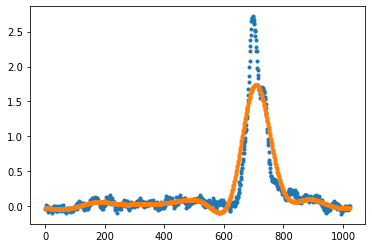

Frequency 1


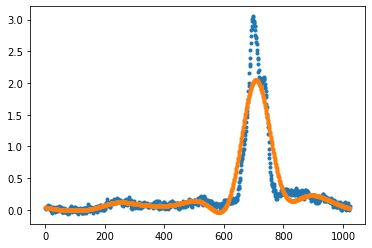

Frequency 2


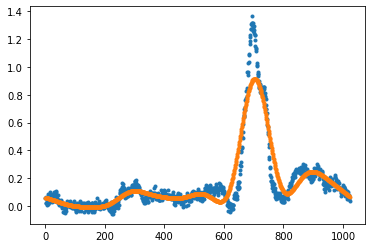

Frequency 3


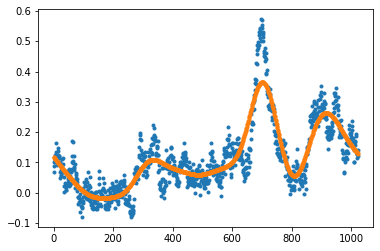

Frequency 4


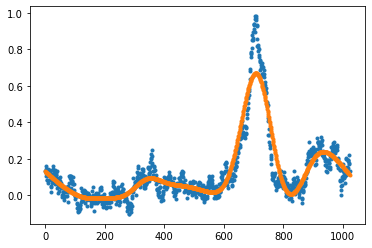

Frequency 5


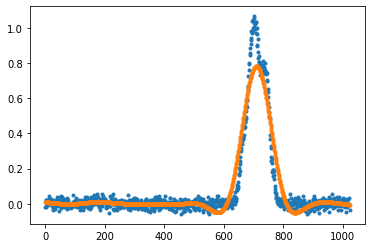

Frequency 6


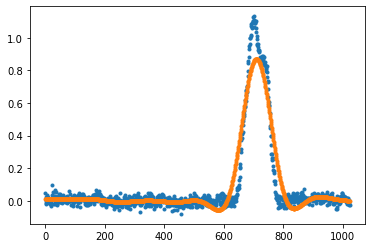

Frequency 7


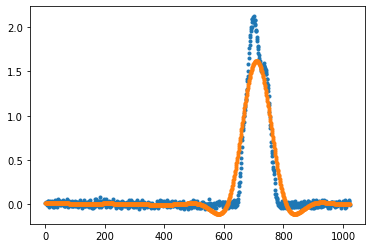

Frequency 8


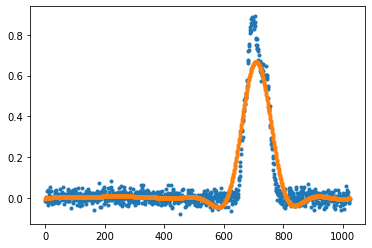

Frequency 9


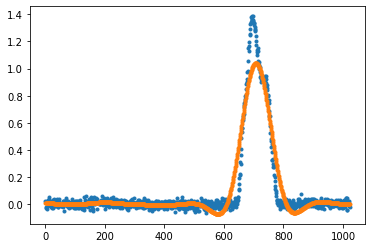

Frequency 10


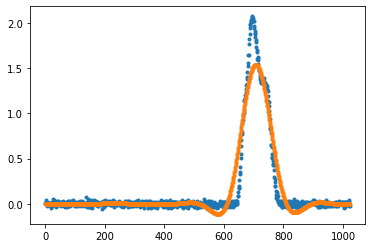

Frequency 11


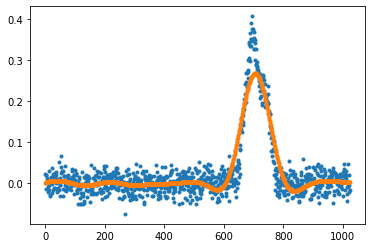

Frequency 12


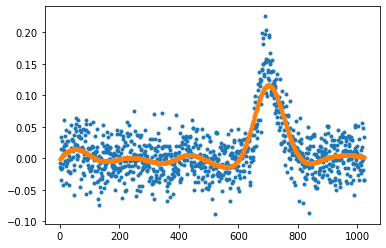

Frequency 13


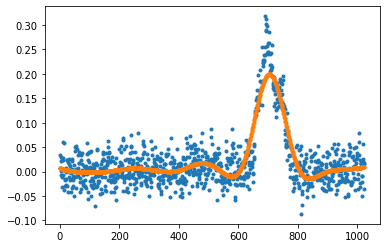

Frequency 14


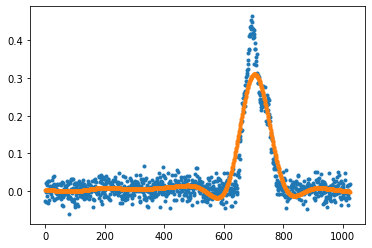

Frequency 15


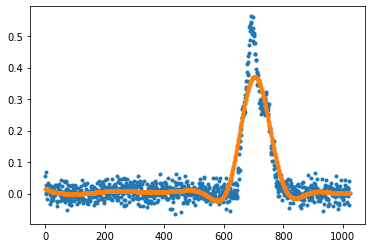

Frequency 16


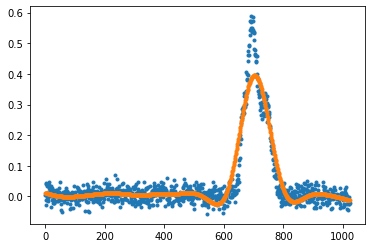

Frequency 17


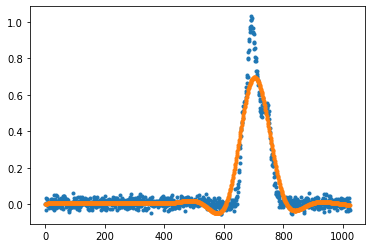

Frequency 18


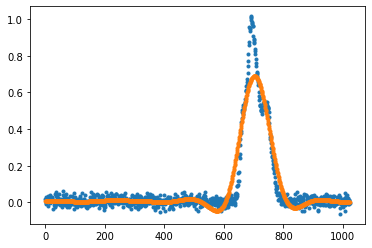

Frequency 19


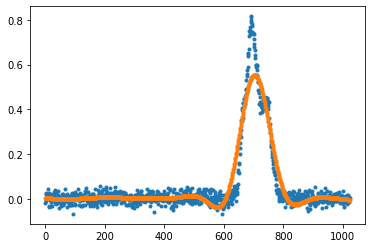

Frequency 20


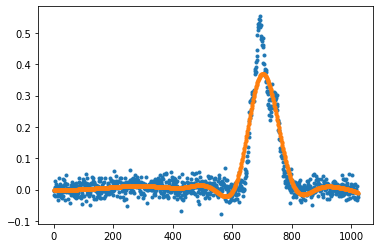

Frequency 21


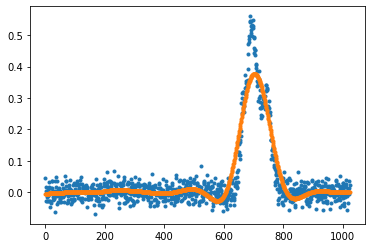

Frequency 22


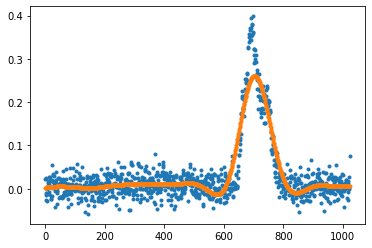

Frequency 23


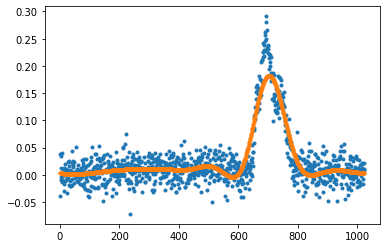

Frequency 24


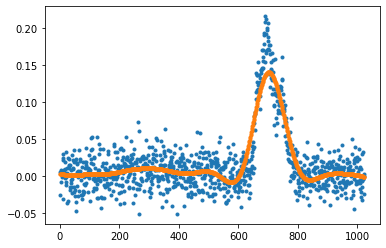

Frequency 25


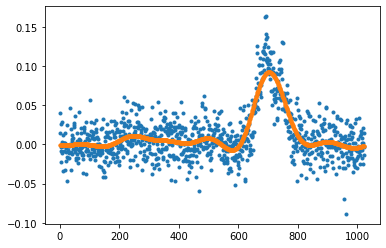

In [40]:
fit_components = []
no_freq_bands=max(AVE_ave['frequency'])+1

#Loop thought all of the frequency bands
for freqband in range(0,no_freq_bands):
    print('Frequency',freqband)
    f = AVE_ave['frequency'] == freqband
    x=AVE_ave['phase'][f]
    y=AVE_ave['intensity'][f]

    data=np.stack([x,y],axis=1)
    
    s=Stickel(data)  
    s.plot(smooth=True, lambda_param=0.00005)
    plt.show()    

Frequency 0


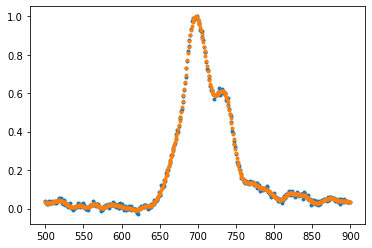

Frequency 1


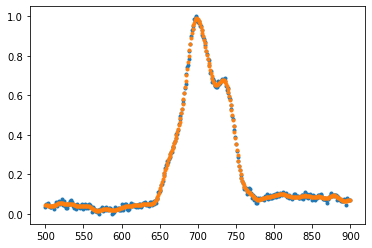

Frequency 2


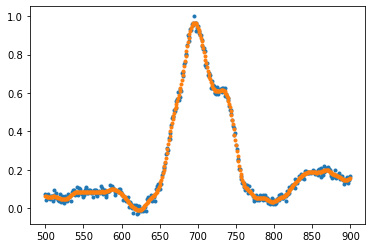

Frequency 3


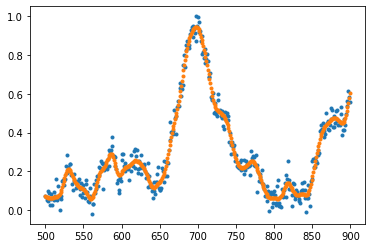

Frequency 4


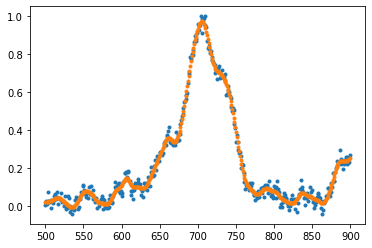

Frequency 5


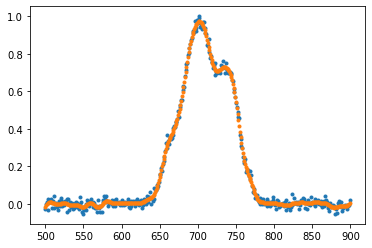

Frequency 6


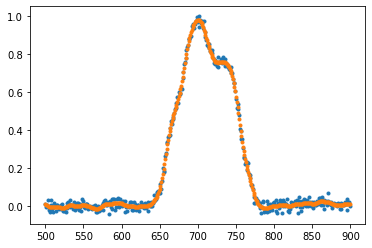

Frequency 7


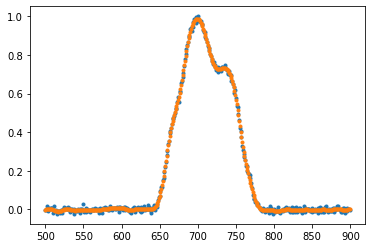

Frequency 8


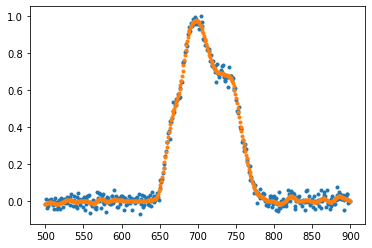

Frequency 9


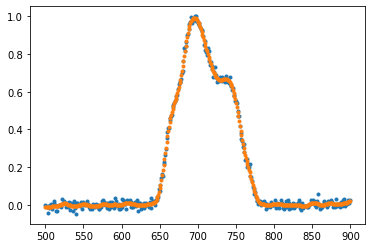

Frequency 10


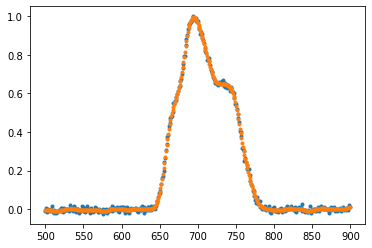

Frequency 11


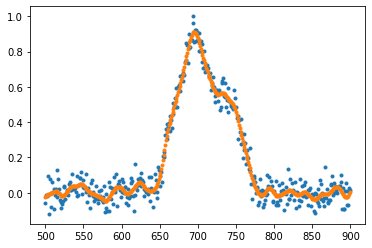

Frequency 12


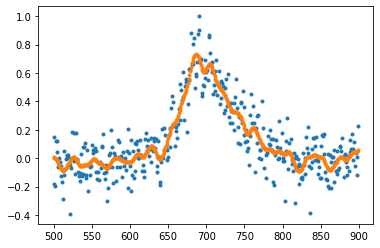

Frequency 13


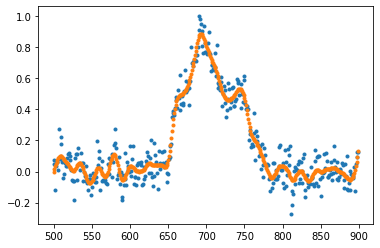

Frequency 14


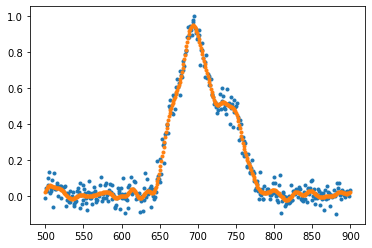

Frequency 15


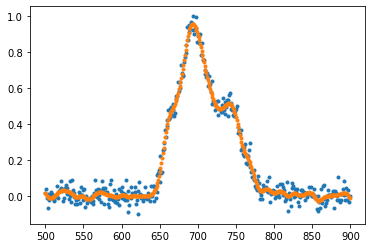

Frequency 16


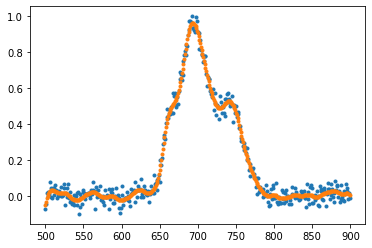

Frequency 17


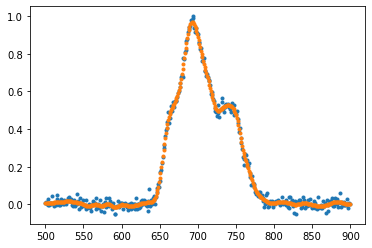

Frequency 18


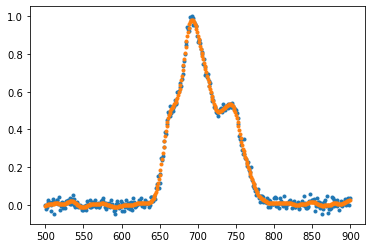

Frequency 19


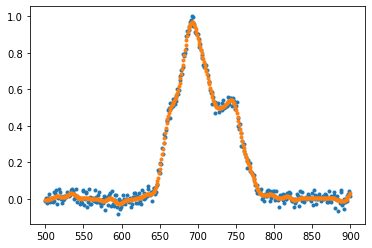

Frequency 20


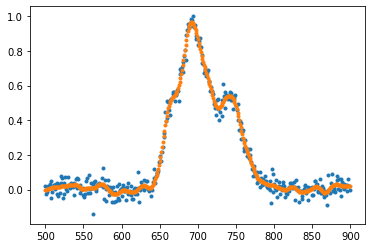

Frequency 21


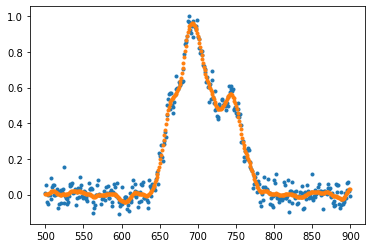

Frequency 22


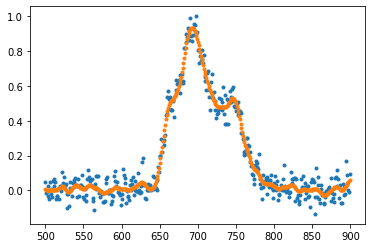

Frequency 23


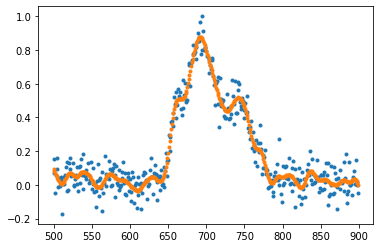

Frequency 24


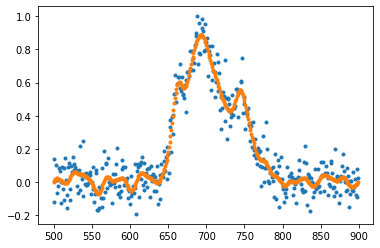

Frequency 25


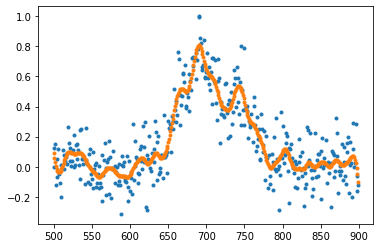

<Figure size 432x288 with 0 Axes>

In [49]:
fit_components = []
no_freq_bands=max(AVE_ave['frequency'])+1

#Loop thought all of the frequency bands
for freqband in range(0,no_freq_bands):
    print('Frequency',freqband)
    f = AVE_ave['frequency'] == freqband
    x=AVE_ave['phase'][f]
    y=AVE_ave['intensity'][f]
    
    #normalise y
    y=y/max(y)

    data=np.stack([x[500:900],y[500:900]],axis=1)
    
    s=Stickel(data)  
    s.plot(smooth=True, lambda_param=0.0000005)
    plt.show()    
    plt.savefig('Stickel-f'+str(freqband))

## FUNCTIONS

In [7]:
component = col.namedtuple('component','phase intensity')
ind_component = col.namedtuple('component','phase intensity width')
pulse_component = col.namedtuple('pulse_component','frequency comp1 comp2 errors')
component_separation = col.namedtuple('component_separation','frequency separation')

In [8]:
def gauss(x,amp,cen,sd):
    return amp*np.exp(-(x-cen)**2/(2*sd**2))\

def multi_gauss(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        a = params[i]
        b = params[i+1]
        c = params[i+2]
        y = y +  a * np.exp( -(((x-b)**2) / (2*c**2)) )
    return y

In [9]:
"""
    Used to get the parameters, covariance matrix and errors for any number of gaussian fits, through and expected value. 
"""
def fitting_parameters(x,y,expected,bound):
    """
    bound=([],[])
    for i in range(len(expected)):
        bound[0].append(0)
        bound[1].append(np.inf)
    """
        
    params,cov=curve_fit(multi_gauss,x,y,expected, bounds=bound)
    sigma=np.sqrt(np.diag(cov))
    return params, cov, sigma

In [10]:
def sigmaClip(data, alpha=3, tol=0.1, ntrials=10):
    """
    Compute the data's median, m, and its standard deviation, sigma.
    Keep only the data that falls in the range (m-alpha*sigma,m+alpha*sigma) for some value of alpha, and discard everything else.
    This operation is repeated ntrials number of times or until the tolerance level is hit.

    Parameters:
    -----------
    data: list
        A list of floats - the data to clip
    alpha: float
        OPTIONAL - Determines the number of sigmas to use to determine the upper nad lower limits. Default=3
    tol: float
        OPTIONAL - The fractional change in the standard deviation that determines when the tolerance is hit. Default=0.1
    ntrils: int
        OPTIONAL - The maximum number of times to apply the operation. Default=10

    Returns:
    --------
    oldstd: float
        The std of the clipped data
    x: list
        The data list that contains only noise, with nans in place of 'real' data
    
    Created by Nick Swainston
    """
    x = np.copy(data)
    oldstd = np.nanstd(x)
    #When the x[x<lolim] and x[x>hilim] commands encounter a nan it produces a
    #warning. This is expected because it is ignoring flagged data from a
    #previous trial so the warning is supressed.
    old_settings = np.seterr(all='ignore')
    for trial in range(ntrials):
        median = np.nanmedian(x)

        lolim = median - alpha * oldstd
        hilim = median + alpha * oldstd
        x[x<lolim] = np.nan
        x[x>hilim] = np.nan

        newstd = np.nanstd(x)
        tollvl = (oldstd - newstd) / newstd

        if tollvl <= tol:
            np.seterr(**old_settings)
            return oldstd, x

        if trial + 1 == ntrials:
            np.seterr(**old_settings)
            return oldstd, x

        oldstd = newstd

In [11]:
def multi_gauss_ddx(x, *params):
    #derivative of gaussian
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        a = params[i]
        b = params[i+1]
        c = params[i+2]
        y = y - a/c**2 * (x - b) * np.exp( -(((x-b)**2) / (2*c**2)) )
    return y

def multi_gauss_d2dx2(x, *params):
    #double derivative of gaussian
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        a = params[i]
        b = params[i+1]
        c = params[i+2]
        y = y + (multi_gauss(x, a, b, c) / c**2) * (((x - b)**2)/(c**2) - 1)
    return y

def jacobian_slope(x, *params):
    """
    Evaluates the Jacobian matrix of a gaussian slope at a single point, x

    Parameters:
    -----------
    x: float
        The point to evaluate
    *params: list
        A list containing three parameters per gaussian component in the order: Amp, Mean, Width

    Returns:
    --------
    J: numpy.matrix
        The Jacobian matrix
    """
    def dda(a, b, c, x):
        return -multi_gauss(x, a, b, c) * (x - b)/(c**2)/a
    def ddb(a, b, c, x):
        return multi_gauss(x, a, b, c) * (1 - (x - b)**2/(c**2))/c**2
    def ddc(a, b, c, x):
        return multi_gauss(x, a, b, c) * (x - b)/(c**3) * (2 - (x-b)**2/(c**2))
    J = []
    for i in range(0, len(params), 3):
        a = params[i]
        b = params[i+1]
        c = params[i+2]
        mypars = [a, b, c, x]
        J.append(dda(*mypars))
        J.append(ddb(*mypars))
        J.append(ddc(*mypars))
    J = np.asmatrix(J)
    return J

In [12]:
def find_x_err(x, popt, pcov):
    """
    Finds the error in the horizontal position of a gaussian fit at the point x.
    Uses the equation sigma_x = sigma_y/d2ydx2 where:
    sigma_x = error in x
    d2ydx2 = second derivative of the gaussian function at point x
    sigma_y = sqrt.J*C*J_T
    J = Jacobian evalutated at point x
    C = covariance matrix of gaussian fit
    J_T = transposed jacobian

    Parameters:
    -----------
    x: list
        A list of points to evaluate the error at
    popt: list
        The parameters used to describe the gaussian fit
    pcov: numpy.matrix
        The covariance matrix corresponding to popt

    Returns:
    --------
    x_err: list
        The error evaluated at each point, x
    """
    x_err = []
    for i, point in enumerate(x):
        J = jacobian_slope(point, *popt)
        d2dx2 = multi_gauss_d2dx2(point, *popt)
        JC = np.matmul(J, pcov)
        sigma_y = np.sqrt( np.matmul(JC, np.transpose(J)).item(0) )
        x_err.append(sigma_y / abs(d2dx2))
    return x_err

In [13]:
def find_minima_maxima_gauss(popt, pcov, x_length):
    """
    Finds all peaks of a gaussian function, where the derivative is equal to zero. 

    Parameters:
    -----------
    popt: list
        A list of length 3N where N is the number of gaussians. This list contains the parameters amp, mean, centre respectively
    x_length: int
        The length of the list used to fit the gaussian

    Returns:
    --------
    minima: list
        A list of the minimum points of the fit
    maxima: list
        A list of the maximum points of the fit
    """
    #Create the derivative list and spline it to find roots
    x = np.linspace(0, x_length-1, x_length)
    dy = multi_gauss_ddx(x, *popt)
    spline_dy = UnivariateSpline(x, dy, s=0)
    roots = spline_dy.roots()
    
    #Find which are max and min
    maxima = []
    minima = []
    for root in roots:
        idx = int(root + 0.5)
        if dy[idx-1] > dy[idx]:
            maxima.append(root)
        else:
            minima.append(root)            
            
    minima_e = find_x_err(minima, popt, pcov)
    maxima_e = find_x_err(maxima, popt, pcov)
    
    return minima, maxima, minima_e, maxima_e

In [50]:
def gauss_peaks(fit, nofreqband, freqband, pcov, params, freq_low, freq_high, noise, data = 'parkes', freq=0):
    """
    Find the peaks of a gaussian fit, take the highest two and create a profile_comp.
    Also converts the phase into degrees and the frequency into MHz.
    
    Parameters:
    -----------
    fit: list
        the gaussian fit to find peaks of
    nofreqband: int
        total number of frequency bins 
    freqband: int
        current frequency band which has been fit
    pcov: list
        the covariance matrix from the fit
    params: list
        the parameters for the fit
    freq_low: int
        the lower boundary of the frequency range
    freq_high: int
        the high boundary of the frequency range
    Returns:
    --------
    profile_comp: pulse_component
        carrys information about each component at a certain frequency
    """
    
    deg_mod=360/len(fit)
    
    #Find the peaks of the fit, and the intensity at those peaks
    minima, peakpos, minima_e, err = find_minima_maxima_gauss(params, pcov, len(fit))
    peakint = multi_gauss(peakpos, *params)
    
    """
    #Removes peaks until only two highest remain - which also have to be the two outer peaks
    #If the highest do not correspond to the outer, the frequency band is not used
    while len(peakpos)>2:
        mn=min(peakint)
        peakint = list(peakint)
        rm = peakint.index(mn)
        if rm!=0 and rm!=len(peakpos)-1:
            del peakpos[rm]
            del peakint[rm]
            del err[rm]
        else:
            break 
    """

    #Assign the peaks to the correct component label, also converts phase from bins to degrees
    
    component1=0
    component2=0
    errr=[]
    
    if(max(peakint)/noise)>3:
        if data=='parkes':
            for n,p in enumerate(peakpos):
                if p>670 and p<710:
                    component1 = component(phase=(deg_mod)*peakpos[n], intensity=peakint[n])
                    errr.append(err[n])
                elif p>720:
                    component2 = component(phase=(deg_mod)*peakpos[n], intensity=peakint[n])
                    errr.append(err[n])
        elif data!='parkes' and len(peakpos)==2:
            component1 = component(phase=(deg_mod)*peakpos[0], intensity=peakint[0])
            errr.append(err[0])
            component2 = component(phase=(deg_mod)*peakpos[1], intensity=peakint[1])
            errr.append(err[1])
    else:
        print("Too noisey", freqband)
                
    if component1==0 or component2==0:
        component1 = component(phase=0, intensity=0)
        component2 = component(phase=0, intensity=0)
        error = 0   
        print("peaks",len(peakpos),peakpos,"band", freqband)
    else:
        error = np.array(errr)*(deg_mod)
        
    """
    if len(peakpos)==2 and (max(peakint)/noise)>3:
        component1 = component(phase=(deg_mod)*peakpos[0], intensity=peakint[0])
        component2 = component(phase=(deg_mod)*peakpos[1], intensity=peakint[1])
        error = np.array(err)*(deg_mod)
    elif len(peakpos)==3 and (max(peakint)/noise)>3:
        component1 = component(phase=(deg_mod)*peakpos[1], intensity=peakint[1])
        component2 = component(phase=(deg_mod)*peakpos[2], intensity=peakint[2])
        error = np.array(err)*(deg_mod)        
    elif len(peakpos)==4 and (max(peakint)/noise)>3:
        component1 = component(phase=(deg_mod)*peakpos[1], intensity=peakint[1])
        component2 = component(phase=(deg_mod)*peakpos[3], intensity=peakint[3])
        error = np.array(err)*(deg_mod)   
    else:
        component1 = component(phase=0, intensity=0)
        component2 = component(phase=0, intensity=0)
        error = 0       
   """
   
    #Converts the frequency from bins to MHz    
    if data=='parkes':
        freq=(((freq_high-freq_low)/nofreqband)*(freqband))+freq_low+((freq_high-freq_low)/(nofreqband*2))
    else:
        freq=freq[freqband]

    profile_comp = pulse_component(frequency=freq, comp1=component1, comp2=component2, errors=error)

    return profile_comp

In [15]:
def fit_peaks(fit, freqband, pcov, params, noise, frequency):
    
    deg_mod=360/len(fit)
    
    #Find the peaks of the fit, and the intensity at those peaks
    peakpos = params[1]
    paramint = params[0]
    errcov = np.sqrt(np.diag(pcov))
    err = errcov[1]
    if len(params)>3:
        peakpos=np.append(peakpos,params[4])
        paramint=np.append(paramint,params[3])
        err = np.append(err,errcov[4])
    if len(params)>6:
        peakpos=np.append(peakpos,params[7])
        paramint=np.append(paramint,params[6])
        err=np.append(err,errcov[7])

    print(peakpos)
    peakint = multi_gauss(peakpos, *params)
    print(peakint)

    #Removes peaks until only two highest remain - which also have to be the two outer peaks
    #If the highest do not correspond to the outer, the frequency band is not used
    while len(peakpos)>2:
        mn=min(paramint)
        paramint = list(paramint)
        rm = paramint.index(mn)   
        print(rm)
        peakpos=np.delete(peakpos,rm)
        peakint=np.delete(peakint,rm)
        err=np.delete(err,rm)

    #Assign the peaks to the correct component label, also converts phase from bins to degrees
    
    component1=0
    component2=0
    errr=[]
    
    if(max(peakint)/noise)>3:
        if len(peakpos)==2:
            component1 = component(phase=(deg_mod)*peakpos[0], intensity=peakint[0])
            errr.append(err[0])
            component2 = component(phase=(deg_mod)*peakpos[1], intensity=peakint[1])
            errr.append(err[1])
    else:
        print("Too noisey", freqband)
                
    if component1==0 or component2==0:
        component1 = component(phase=0, intensity=0)
        component2 = component(phase=0, intensity=0)
        error = 0   
        print("peaks",len(peakpos),peakpos,"band", freqband)
    else:
        error = np.array(errr)*(deg_mod)

    #Converts the frequency from bins to MHz    
    freq=frequency[freqband]
    
    profile_comp = pulse_component(frequency=freq, comp1=component1, comp2=component2, errors=error)

    return profile_comp

In [16]:
"""
    Graphing Sub-pulse operation:
    Used to get the correct x, y and error arrays created for graphing the data and finding a fit.
"""
def graphing_comp(fit_comp,comp_num):
        phase_comp=[]
        frequency_comp=[]
        comp_err=[]

        for i in range(0,len(fit_comp)):
            if fit_comp[i][comp_num][0]!=0:
                phase_comp.append(fit_comp[i][comp_num][0])
                frequency_comp.append(fit_comp[i][0])
                comp_err.append(fit_comp[i][3][comp_num-1])

        return phase_comp, frequency_comp, comp_err    

In [17]:
"""
    Used to remove outliers more than the threshold number of standard deviations from the mean. 
    Also removes points with high errors (greater than 100 degrees).
"""
def detect_outlier(frequency_comp, phase_comp, comp_err , threshold):
    phase=[]
    frequency=[]
    err=[]
    
    #Find mean and standard deviation of data
    mean_1 = np.mean(phase_comp)
    std_1 =np.std(phase_comp)
    
    for i in range(len(phase_comp)):
        #Find z score
        z_score= (phase_comp[i] - mean_1)/std_1 
        #Only include points which have a z score under the threshold value, and with errors less than 100 degrees
        if np.abs(z_score) < threshold and comp_err[i]<20:
            phase.append(phase_comp[i])
            frequency.append(frequency_comp[i])
            err.append(comp_err[i])
    return frequency, phase, err

In [18]:
def thorsett(x, A, alpha, smin):
    return (A * (x**(alpha)) + smin)
def powerlaw(x, A, alpha):
    return (A * (x**(alpha)))
def linear(x, m, c):
    return ((m * np.array(x)) + c)

In [19]:
"""
    Used to gain separation of components values and the uncertainties. 
"""
def separation_singleprofile(components_array):
    sep_array=[]
    uncert=[]

    #Go through all the different frequencies
    for i in range(0,len(components_array)):
        if components_array[i][1][0] != 0 and components_array[i][2][0] != 0:
            freq=components_array[i][0]
            #Subtract second component from first
            sep=(components_array[i][2][0]) - (components_array[i][1][0])
            single_sep=component_separation(frequency=freq, separation=sep)
            sep_array.append(single_sep)
            #Calculate uncertainty
            uncert.append(np.sqrt((components_array[i][3][0])**2 + (components_array[i][3][1])**2))
    return sep_array, uncert

In [20]:
def plot_peaks(x,y,profile_comp):
    plt.plot(x,y, lw=1)
    plt.plot(x, fit, color='red', lw=3, label='gaussian fit')

    x=[profile_comp[i][0] for i in range(1,3)]
    y=[profile_comp[i][1] for i in range(1,3)]

    plt.plot(x, y ,'X', markerfacecolor='black', markeredgecolor='black', label='peaks')

    plt.xlabel('Phase (deg)')
    plt.ylabel('Intensity')
    plt.legend()
    return

In [21]:
def component_positions(averageprofiles,expected1,bounds1,minf,maxf):
    fit_components = []
    no_freq_bands=max(averageprofiles['frequency'])+1

    #Loop thought all of the frequency bands
    for freqband in range(0,no_freq_bands):
        f = averageprofiles['frequency'] == freqband
        x=averageprofiles['phase'][f]
        y=averageprofiles['intensity'][f]

        noise = sigmaClip(y)
        error = np.nanstd(noise[1])

        #Fit the gaussians and find peaks and errors, create array with all frequencies
        #Resulting frequencies are in MHz and phase in degrees
        if len(x)!=0 and len(y)!=0:
            try:
                params,cov,sigma = fitting_parameters(x,y,expected1,bounds1)
                fit = multi_gauss(x,*params)
                profile_comp = gauss_peaks(fit, no_freq_bands, freqband, cov, params, minf,maxf,error)
            except:
                component1 = component(phase=0, intensity=0)
                component2 = component(phase=0, intensity=0)
                error = 0             
                freq=(((maxf-minf)/no_freq_bands)*(freqband))+minf+((maxf-minf)/(no_freq_bands*2))
                profile_comp = pulse_component(frequency=freq, comp1=component1, comp2=component2, errors=error)
            fit_components.append(profile_comp)
    return fit_components

In [22]:
def plot_comp_movement(fit_components,title,colour,comnum,outlierrem):
    #Separate the array into x and y axis of phase and frequency which can be graphed
    phase_comp1, frequency_comp1, comp1_err=graphing_comp(fit_components,comnum)
    #Plot points
    #plt.errorbar(phase_comp1,frequency_comp1, xerr=comp1_err, fmt='.', lw=0.5, color='red')
    plt.title(title)
    plt.xlabel('Phase (deg)')
    plt.ylabel('Frequency')
    #Remove outliers which are greater than 'threshold' number of std away from the mean
    frequency_comp1, phase_comp1, comp1_err = detect_outlier(frequency_comp1, phase_comp1, comp1_err,outlierrem)
    #Plot outlier removed points"
    plt.errorbar(phase_comp1,frequency_comp1, xerr=comp1_err, fmt='.', lw=0.5, color=colour,label='data')
    
    #Fit the thorsett model to the component position
    y_range=list(range(minf,maxf))
    #Fit a linear 
    comp1_paramslin,comp1_covlin=curve_fit(linear,frequency_comp1,phase_comp1, maxfev=10000, sigma=comp1_err)
    comp1_fit_errorlin=np.sqrt(np.diag(comp1_covlin))
    comp1_fitlin = linear(y_range, *comp1_paramslin)
    
    #Plot linear
    #plt.plot(comp1_fitlin, y_range,color='black',lw=2, label='linear fit', zorder=1)
    #plt.legend()

    return comp1_fitlin, y_range

In [23]:
def plot_sep_movement(fit_components,title,colour,outlierrem):
    y_range=list(range(minf,maxf))
    #Gain component separation values
    component_sep, sep_error = separation_singleprofile(fit_components)
    comp_sep=[]
    frequency_forsep=[]
    #Put them into arrays for graphing
    for i in range(0,len(component_sep)):
        comp_sep.append(component_sep[i][1])
        frequency_forsep.append(component_sep[i][0])
    
    #Plot points
    #plt.errorbar(frequency_forsep, comp_sep, yerr=sep_error, color='red', fmt='.', lw=0.5)
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('\u0394\u03B8 (deg)')
    #Remove outliers
    frequency_forsep, comp_sep, sep_error = detect_outlier(frequency_forsep, comp_sep, sep_error, outlierrem)
    #Plot points with outliers removed
    plt.errorbar(frequency_forsep, comp_sep, yerr=sep_error, color=colour, fmt='.', lw=0.5, label='data')
    plt.title(title)
    
    #Create a thorsett fit
    expect=(703,0.5,10)
    sep_params,sep_cov=curve_fit(thorsett,frequency_forsep,comp_sep, expect, maxfev=10000, sigma=sep_error, bounds=([0,-1,-np.inf],[np.inf,0.5,np.inf]))
    sep_fit_error=np.sqrt(np.diag(sep_cov))
    separation_fit=thorsett(y_range,*sep_params)
    
    plt.plot(y_range,separation_fit, color='lightgrey',lw=1,label='empirical fit',zorder=0.1)
    return y_range, separation_fit, sep_params

In [24]:
def find_widths(profile, popt, pcov):
    #perform spline operations on the fit
    x = np.linspace(0, len(profile)-1, len(profile))
    fit = multi_gauss(x, *popt)
    amp_fit = max(fit) - min(fit)
    spline10 = UnivariateSpline(x, fit - np.full(len(x), 0.1*amp_fit), s=0)
    spline50 = UnivariateSpline(x, fit - np.full(len(x), 0.5*amp_fit), s=0)

    #find W10, W50 and Wscat
    W10_roots = spline10.roots()
    W50_roots = spline50.roots()
    W10 = W10_roots[-1] - W10_roots[0]
    W50 = W50_roots[-1] - W50_roots[0]

    #W10 root errors
    err_10 = find_x_err(W10_roots, popt, pcov)
    W10_e = np.sqrt(err_10[0]**2 + err_10[-1]**2)

    #W50 root errors
    err_50 = find_x_err(W50_roots, popt, pcov)
    W50_e = np.sqrt(err_50[0]**2 + err_50[-1]**2)
    
    return W10, W50, W10_e, W50_e

In [25]:
def plot_intensities(fit_components, title, colour):  
    #Find intensity of component1
    intensity_comp1=[]
    frequency_comp1=[]
    intensity_comp2=[]
    frequency_comp2=[]

    for i in range(0,len(fit_components)):
        if fit_components[i][1][0] != 0:
            intensity_comp1.append(fit_components[i][1][1])
            frequency_comp1.append(fit_components[i][0])
            intensity_comp2.append(fit_components[i][2][1])
            frequency_comp2.append(fit_components[i][0])

    int_ratio=np.array(intensity_comp1)/np.array(intensity_comp2)
    

    plt.plot(frequency_comp2,int_ratio, '.', lw=0.5, color=colour,label='data')
    plt.title('Intensity Ratio of Component 1/Component 2')
    plt.xlabel('Frequency')
    plt.ylabel('Intensity Ratio')
    plt.title(title)
    
    #Fit the thorsett model to the component position
    y_range=list(range(minf,maxf))
    #Fit a linear 
    ratio_paramslin,ratio_covlin=curve_fit(linear,frequency_comp2,int_ratio, maxfev=10000) #sigma=comp1_err)
    ratio_fit_errorlin=np.sqrt(np.diag(ratio_covlin))
    ratio_fitlin = linear(y_range, *ratio_paramslin)
    
    #Plot linear
    plt.plot(y_range,ratio_fitlin,color='lightgrey',lw=1, label='linear fit', zorder=1)
    plt.legend()
    
    return y_range, ratio_fitlin, ratio_paramslin